In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # 🌙 Dark theme
    sns.set_theme(style="darkgrid", palette="dark")
    plt.style.use("dark_background")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

In [3]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt #for vasulaization
import seaborn as sns #for vasulaization
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu

#machine learning library
from sklearn.model_selection import train_test_split #=> split data to trian & test
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
#DeepLearning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [5]:

def eda_summary(filepath=None, df=None):
    """
    Function to perform basic EDA steps:
    - Read CSV (if filepath provided)
    - Show head of data
    - Show missing values
    - Show duplicated values
    - Show shape
    - Describe data
    - Show info (numerical/categorical)
    - Show NULL percentage per column
    """
    # read file path in kaggle
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")

    print("\n--- First 5 Rows ---")
    display(df.head())

    print("\n--- Missing Values ---")
    print(df.isnull().sum())

    print("\n--- Duplicated Rows ---")
    print(df.duplicated().sum())

    print("\n--- Shape ---")
    print(df.shape)

    print("\n--- Description ---")
    display(df.describe(include='all'))

    print("\n--- Data Info ---")
    df.info()

    print("\n--- NULL Percentage ---")
    data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
    display(data_null.to_frame(name='Percent NULL data (%)'))

    return df

In [6]:
def eda_report(filepath=None, df=None):
    """
    Generate an EDA summary report for a dataset:
    - Missing values (count & %)
    - Duplicated rows (overall count)
    - Column data types
    - Unique values count
    """
    # read DataFrame File
    if filepath is not None:
        df = pd.read_csv(filepath)
    elif df is None:
        raise ValueError("Please provide either a CSV filepath or a DataFrame.")

    # summarize
    report = pd.DataFrame({
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Missing %": round(df.isnull().sum() / len(df) * 100, 2),
        "Unique Values": df.nunique()
    })

    # Specify column type (numeric/text/other)
    report["Column Type"] = report["Data Type"].apply(
        lambda x: "Numeric" if pd.api.types.is_numeric_dtype(x)
        else "Categorical" if pd.api.types.is_string_dtype(x)
        else "Other"
    )

    # Add the number of duplicate rows in the last row
    duplicates = df.duplicated().sum()
    summary_row = pd.DataFrame({
        "Data Type": ["-"],
        "Missing Values": ["-"],
        "Missing %": ["-"],
        "Unique Values": ["-"],
        "Column Type": ["-"]
    }, index=["Duplicated Rows = " + str(duplicates)])

    report = pd.concat([report, summary_row])

    return report

In [7]:
eda_report(filepath="/content/drive/MyDrive/Data Mining lung/cancer patient data sets.csv")

Data Type Missing Values Missing % Unique Values  \
index                        int64              0       0.0          1000   
Patient Id                  object              0       0.0          1000   
Age                          int64              0       0.0            40   
Gender                       int64              0       0.0             2   
Air Pollution                int64              0       0.0             8   
Alcohol use                  int64              0       0.0             8   
Dust Allergy                 int64              0       0.0             8   
OccuPational Hazards         int64              0       0.0             8   
Genetic Risk                 int64              0       0.0             7   
chronic Lung Disease         int64              0       0.0             7   
Balanced Diet                int64              0       0.0             7   
Obesity                      int64              0       0.0             7   
Smoking                      int64              0       0.0             8   
Passive Smoker               int64              0       0.0             8   
Chest Pain                   int64              0       0.0             9   
Coughing of Blood            int64              0       0.0             9   
Fatigue                      int64              0       0.0             8   
Weight Loss                  int64              0       0.0             8   
Shortness of Breath          int64              0       0.0             8   
Wheezing                     int64              0       0.0             8   
Swallowing Difficulty        int64              0       0.0             8   
Clubbing of Finger Nails     int64              0       0.0             9   
Frequent Cold                int64              0       0.0             7   
Dry Cough                    int64              0       0.0             7   
Snoring                      int64              0       0.0             7   
Level                       object              0       0.0             3   
Duplicated Rows = 0              -              -         -             -   

                          Column Type  
index                         Numeric  
Patient Id                Categorical  
Age                           Numeric  
Gender                        Numeric  
Air Pollution                 Numeric  
Alcohol use                   Numeric  
Dust Allergy                  Numeric  
OccuPational Hazards          Numeric  
Genetic Risk                  Numeric  
chronic Lung Disease          Numeric  
Balanced Diet                 Numeric  
Obesity                       Numeric  
Smoking                       Numeric  
Passive Smoker                Numeric  
Chest Pain                    Numeric  
Coughing of Blood             Numeric  
Fatigue                       Numeric  
Weight Loss                   Numeric  
Shortness of Breath           Numeric  
Wheezing                      Numeric  
Swallowing Difficulty         Numeric  
Clubbing of Finger Nails      Numeric  
Frequent Cold                 Numeric  
Dry Cough                     Numeric  
Snoring                       Numeric  
Level                     Categorical  
Duplicated Rows = 0                 -

In [8]:
#read file from function
df = eda_summary(filepath="/content/drive/MyDrive/Data Mining lung/cancer patient data sets.csv")


--- First 5 Rows ---


index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High  

[5 rows x 26 columns]


--- Missing Values ---
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

--- Duplicated Rows ---
0

--- Shape ---
(1000, 26)

--- Description ---


index Patient Id          Age       Gender  Air Pollution  \
count   1000.000000       1000  1000.000000  1000.000000      1000.0000   
unique          NaN       1000          NaN          NaN            NaN   
top             NaN       P999          NaN          NaN            NaN   
freq            NaN          1          NaN          NaN            NaN   
mean     499.500000        NaN    37.174000     1.402000         3.8400   
std      288.819436        NaN    12.005493     0.490547         2.0304   
min        0.000000        NaN    14.000000     1.000000         1.0000   
25%      249.750000        NaN    27.750000     1.000000         2.0000   
50%      499.500000        NaN    36.000000     1.000000         3.0000   
75%      749.250000        NaN    45.000000     2.000000         6.0000   
max      999.000000        NaN    73.000000     2.000000         8.0000   

        Alcohol use  Dust Allergy  OccuPational Hazards  Genetic Risk  \
count   1000.000000   1000.000000           1000.000000   1000.000000   
unique          NaN           NaN                   NaN           NaN   
top             NaN           NaN                   NaN           NaN   
freq            NaN           NaN                   NaN           NaN   
mean       4.563000      5.165000              4.840000      4.580000   
std        2.620477      1.980833              2.107805      2.126999   
min        1.000000      1.000000              1.000000      1.000000   
25%        2.000000      4.000000              3.000000      2.000000   
50%        5.000000      6.000000              5.000000      5.000000   
75%        7.000000      7.000000              7.000000      7.000000   
max        8.000000      8.000000              8.000000      7.000000   

        chronic Lung Disease  ...      Fatigue  Weight Loss  \
count            1000.000000  ...  1000.000000  1000.000000   
unique                   NaN  ...          NaN          NaN   
top                      NaN  ...          NaN          NaN   
freq                     NaN  ...          NaN          NaN   
mean                4.380000  ...     3.856000     3.855000   
std                 1.848518  ...     2.244616     2.206546   
min                 1.000000  ...     1.000000     1.000000   
25%                 3.000000  ...     2.000000     2.000000   
50%                 4.000000  ...     3.000000     3.000000   
75%                 6.000000  ...     5.000000     6.000000   
max                 7.000000  ...     9.000000     8.000000   

        Shortness of Breath     Wheezing  Swallowing Difficulty  \
count           1000.000000  1000.000000            1000.000000   
unique                  NaN          NaN                    NaN   
top                     NaN          NaN                    NaN   
freq                    NaN          NaN                    NaN   
mean               4.240000     3.777000               3.746000   
std                2.285087     2.041921               2.270383   
min                1.000000     1.000000               1.000000   
25%                2.000000     2.000000               2.000000   
50%                4.000000     4.000000               4.000000   
75%                6.000000     5.000000               5.000000   
max                9.000000     8.000000               8.000000   

        Clubbing of Finger Nails  Frequent Cold    Dry Cough      Snoring  \
count                1000.000000    1000.000000  1000.000000  1000.000000   
unique                       NaN            NaN          NaN          NaN   
top                          NaN            NaN          NaN          NaN   
freq                         NaN            NaN          NaN          NaN   
mean                    3.923000       3.536000     3.853000     2.926000   
std                     2.388048       1.832502     2.039007     1.474686   
min                     1.000000       1.000000     1.000000     1.000000   
25%                     2.000000       2.000000     2.0000


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest 

Percent NULL data (%)
index                                       0.0
Patient Id                                  0.0
Age                                         0.0
Gender                                      0.0
Air Pollution                               0.0
Alcohol use                                 0.0
Dust Allergy                                0.0
OccuPational Hazards                        0.0
Genetic Risk                                0.0
chronic Lung Disease                        0.0
Balanced Diet                               0.0
Obesity                                     0.0
Smoking                                     0.0
Passive Smoker                              0.0
Chest Pain                                  0.0
Coughing of Blood                           0.0
Fatigue                                     0.0
Weight Loss                                 0.0
Shortness of Breath                         0.0
Wheezing                                    0.0
Swallowing Difficulty                       0.0
Clubbing of Finger Nails                    0.0
Frequent Cold                               0.0
Dry Cough                                   0.0
Snoring                                     0.0
Level                                       0.0

In [9]:
#create function
def eda_visuals(df, corr_method='spearman'):
    """
    Generate visualization plots for EDA:
    - Boxplots for numerical columns (outlier detection)
    - Distributions (histograms with KDE) for numerical columns
    - Pie charts for categorical columns
    - Correlation heatmap (default = Spearman)
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns

    # 🎨 Color palette
    palette = sns.color_palette("husl", len(numerical_cols))

    # --- Boxplots (Outliers) ---
    plt.figure(figsize=(25, 18))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.boxplot(y=df[col], color=palette[i-1])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

    # --- Distributions ---
    plt.figure(figsize=(25, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(6, 6, i)
        sns.histplot(df[col], kde=True, color=palette[i-1], bins=30)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # --- Pie Charts for categorical data ---
    if len(categorical_cols) > 0:
        n_categorical = len(categorical_cols)
        n_cols = 3 # Number of columns in the subplot grid
        n_rows = (n_categorical + n_cols - 1) // n_cols # Calculate number of rows needed

        plt.figure(figsize=(n_cols * 6, n_rows * 6)) # Adjust figure size based on grid
        for i, col in enumerate(categorical_cols, 1):
            plt.subplot(n_rows, n_cols, i)
            df[col].value_counts().plot.pie(
                autopct='%1.1f%%',
                startangle=90,
                cmap='tab20'
            )
            plt.title(f'Pie Chart of {col}')
            plt.ylabel('')
        plt.tight_layout()
        plt.show()

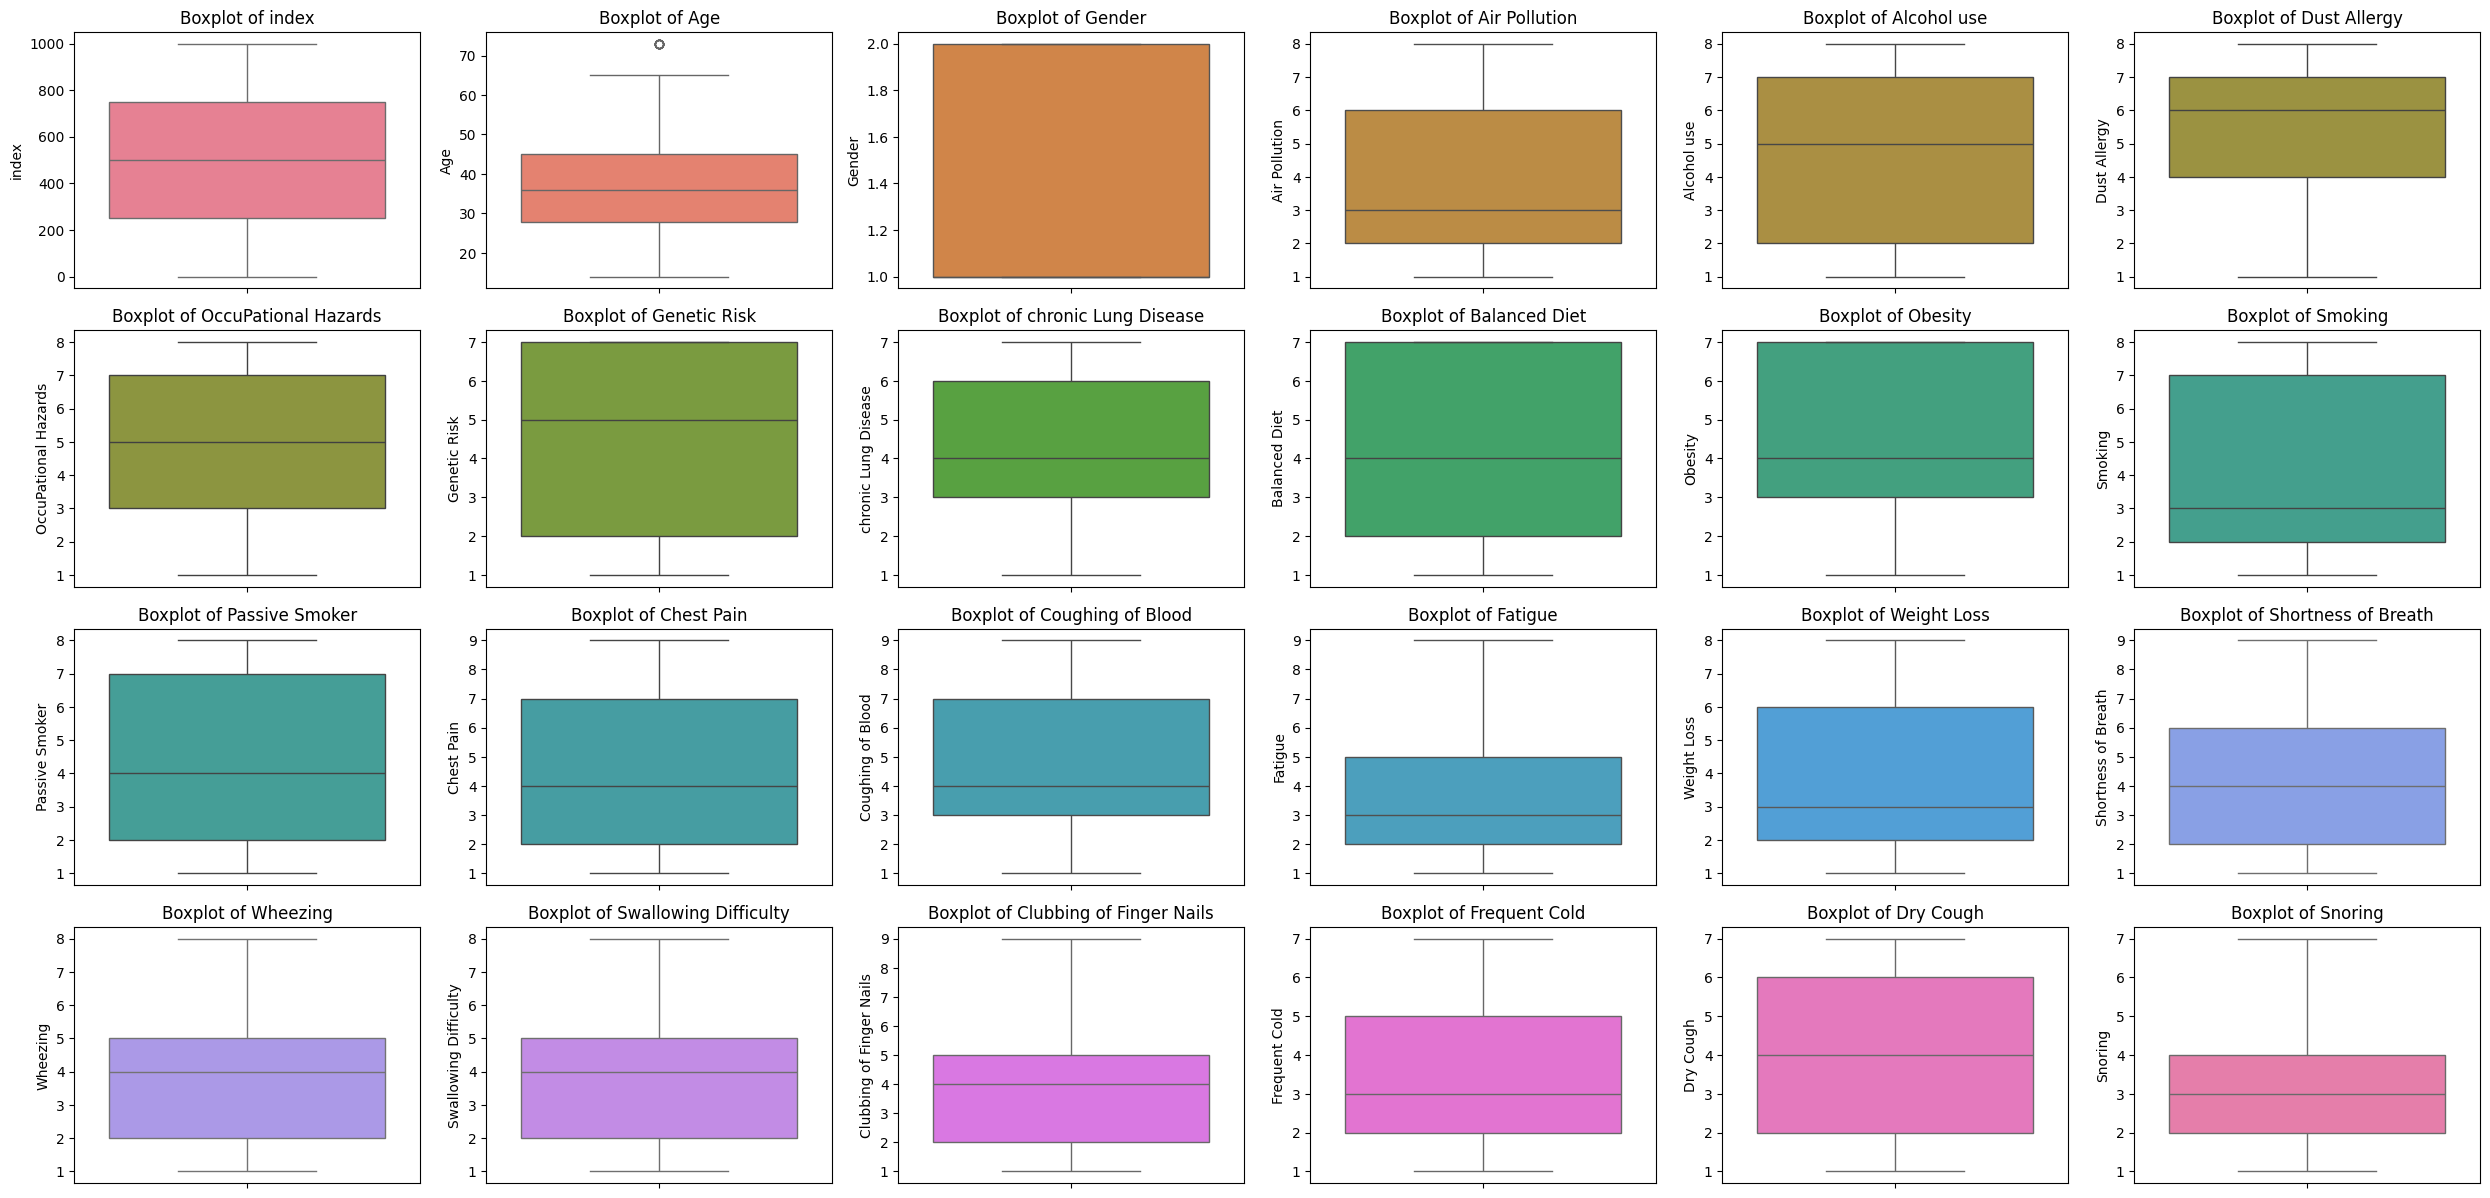

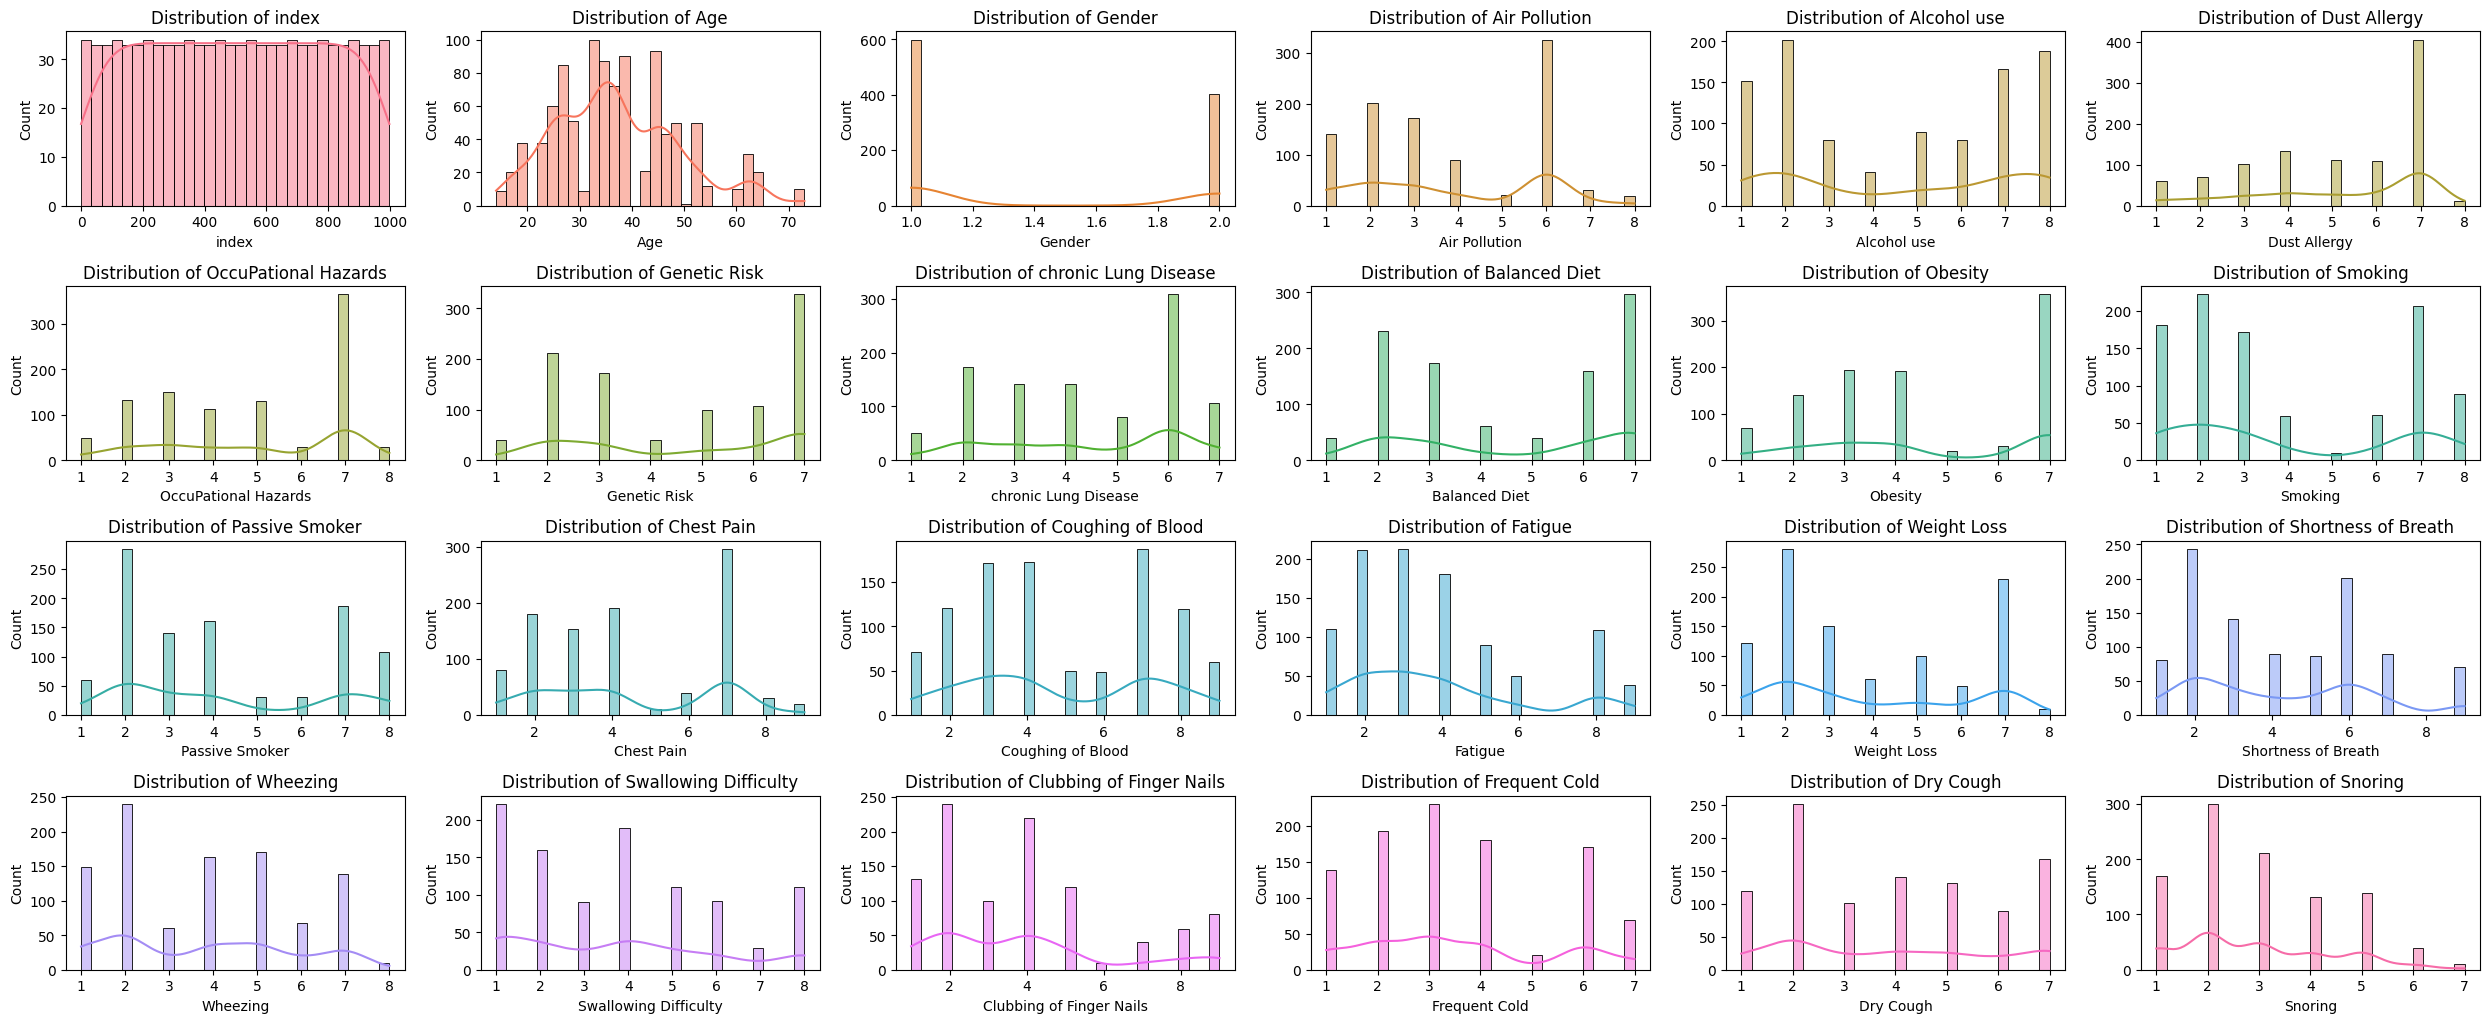

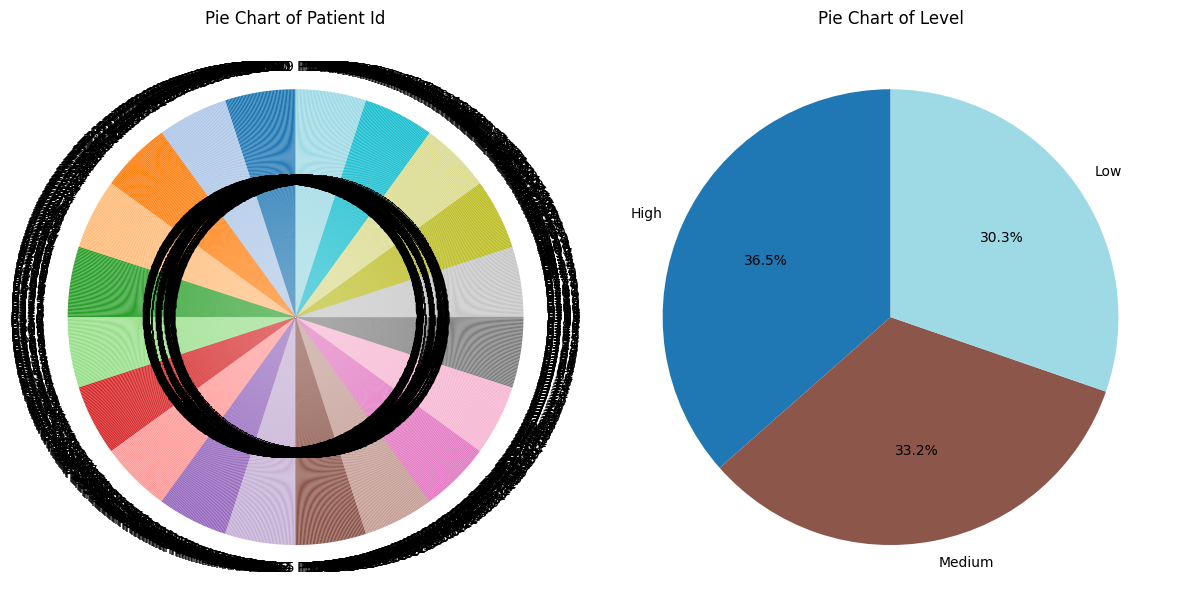

In [10]:
#call function
eda_visuals(df)

In [12]:
def eda_relationships(df, target_col="lung_cancer"):
    """
    Explore deeper relationships between features:
    - Correlation heatmap for numeric features
    - Countplots for categorical vs target
    - Boxplots for numeric vs target
    - Pairplot for selected features
    Dark theme is applied for better visual comfort.
    """

    # ☀️ White theme
    sns.set_theme(style="whitegrid", palette="pastel")
    plt.style.use("default")

    # Select numeric and categorical columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Correlation Heatmap ---
    plt.figure(figsize=(8, 6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap="mako", center=0, linewidths=.5)
    plt.title("Correlation Heatmap (Numeric Features)", fontsize=14, color="w")
    plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue=target_col, palette="viridis")
        plt.title(f"{col} vs {target_col}", fontsize=14, color="w")
        plt.xticks(rotation=30)
        plt.show()

    # --- Numeric vs Target (Boxplots) ---
    for col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=target_col, y=col, palette="plasma")
        plt.title(f"{col} Distribution by {target_col}", fontsize=14, color="w")
        plt.show()

    # --- Pairplot (Relationships) ---
    selected_features = list(numeric_cols) + [target_col]
    sns.pairplot(df[selected_features], hue=target_col, palette="cubehelix", diag_kind="kde")
    plt.suptitle("Pairwise Relationships", y=1.02, color="w", fontsize=14)
    plt.show()

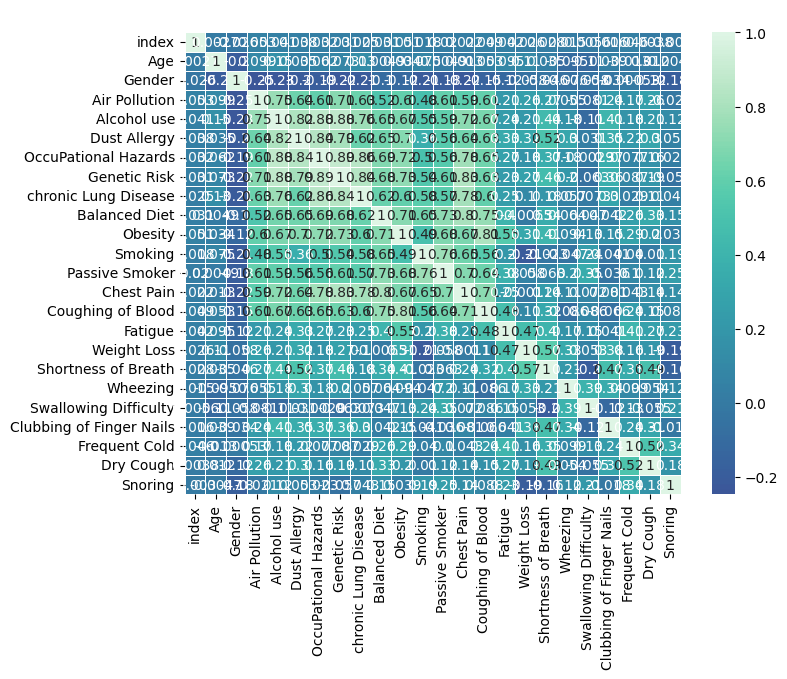

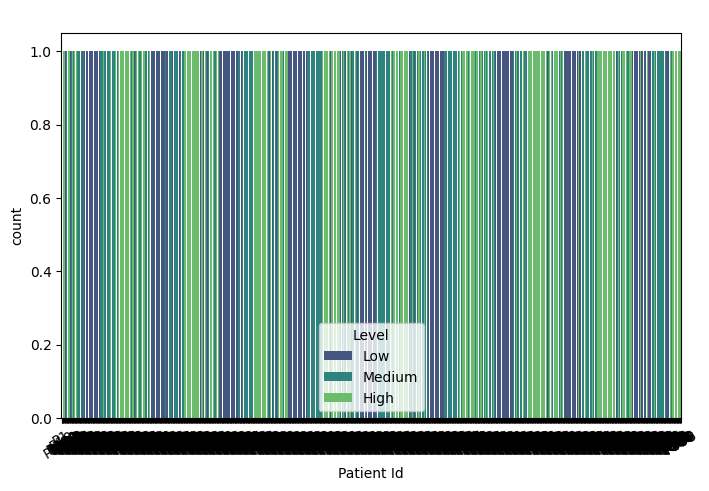

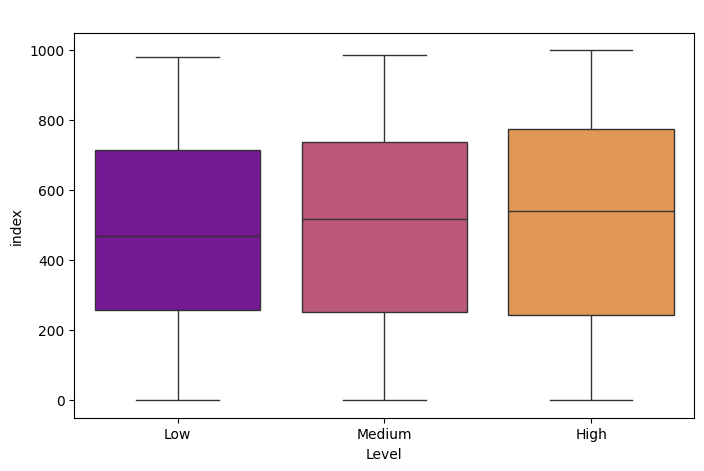

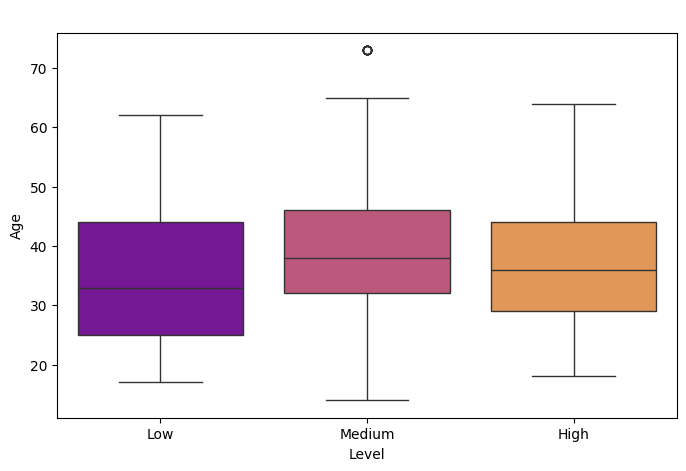

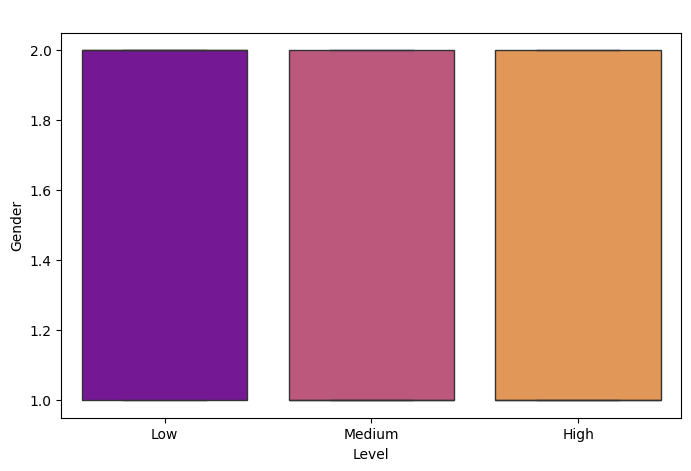

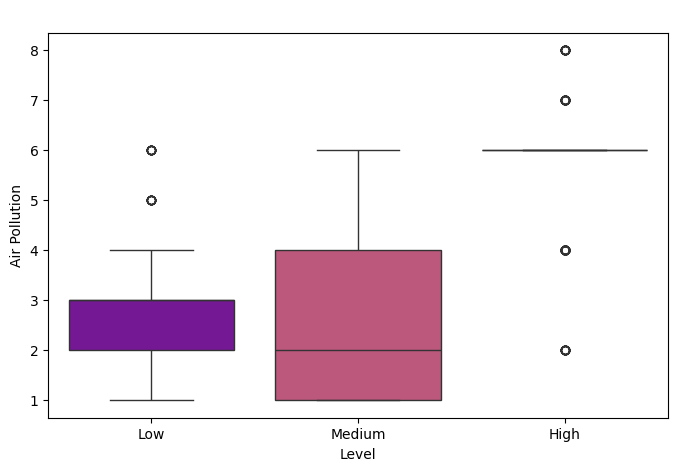

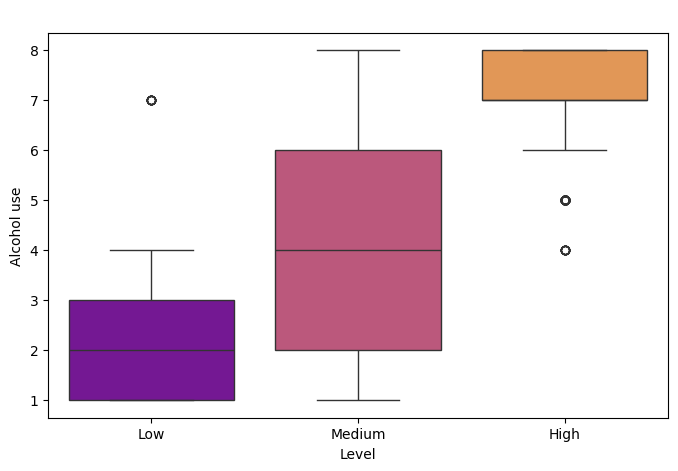

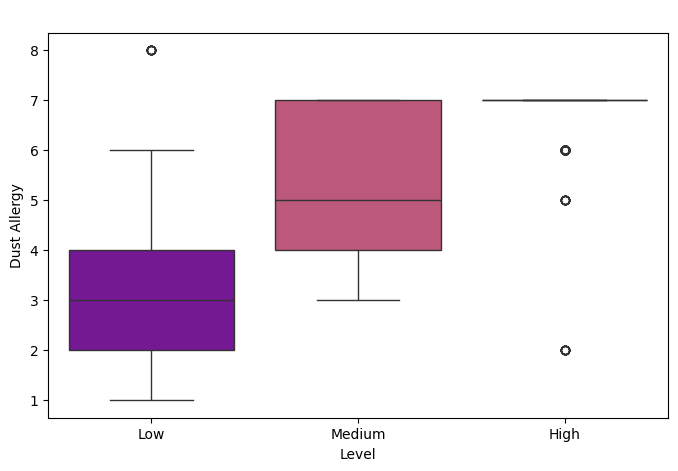

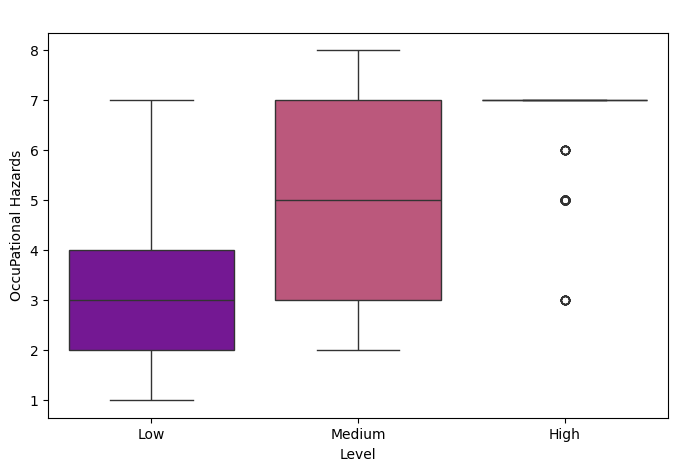

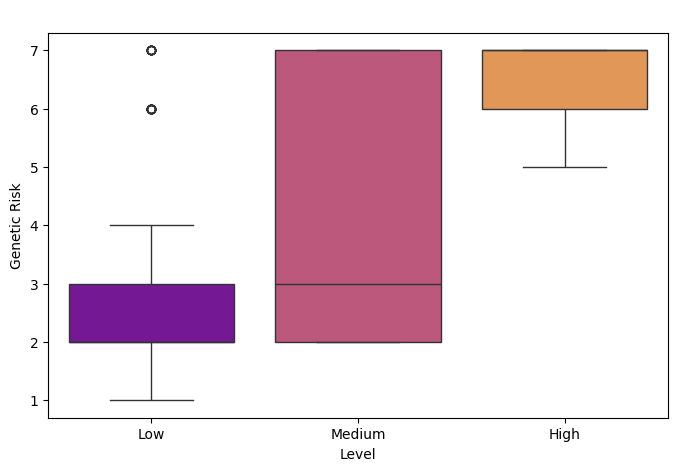

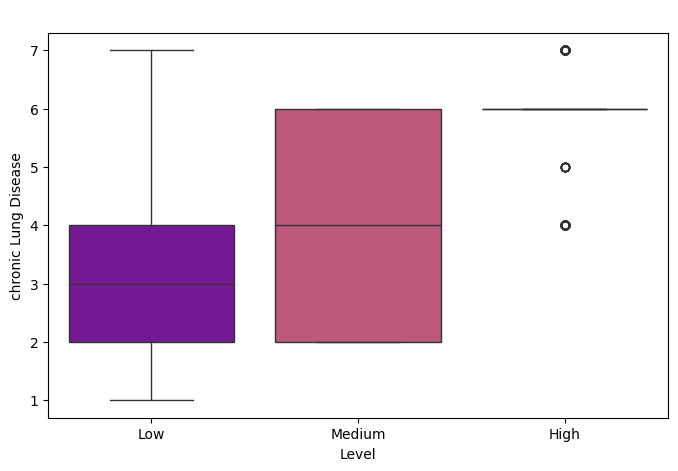

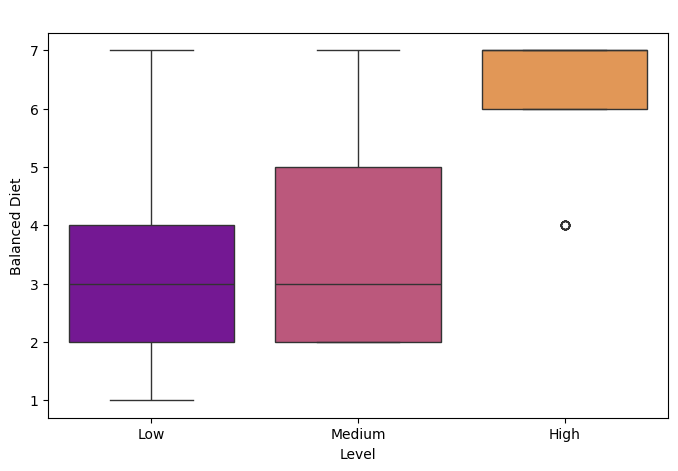

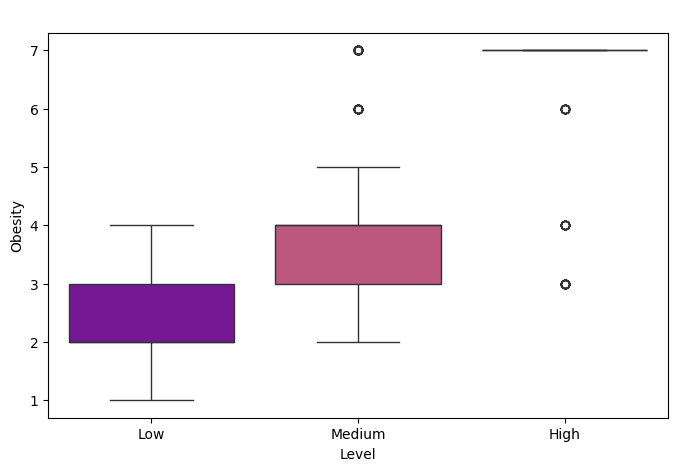

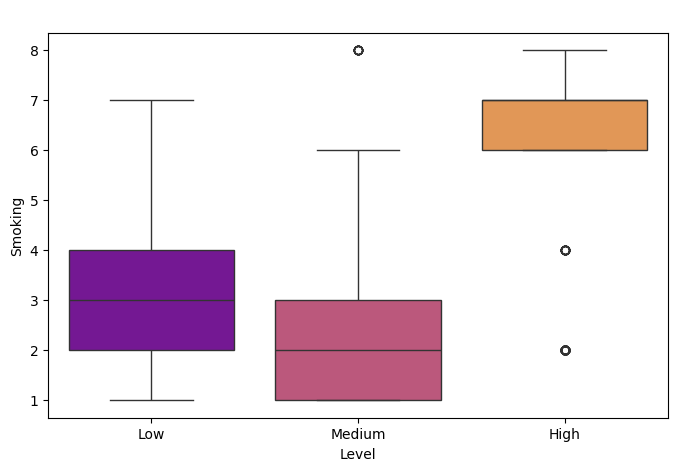

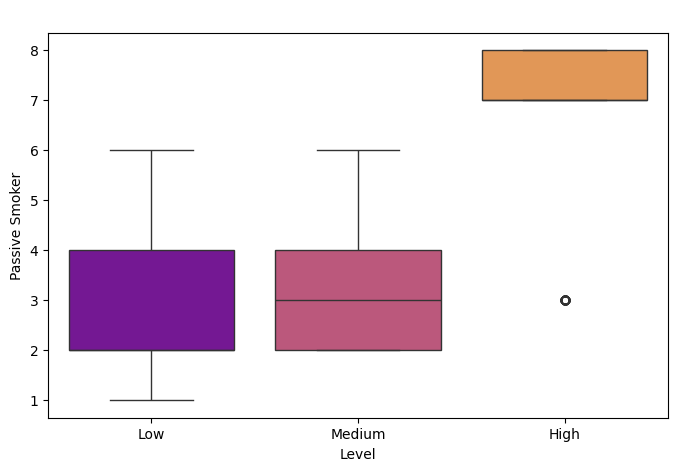

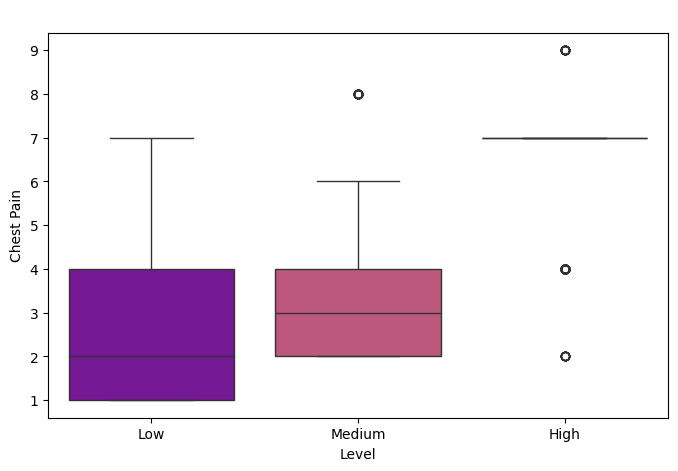

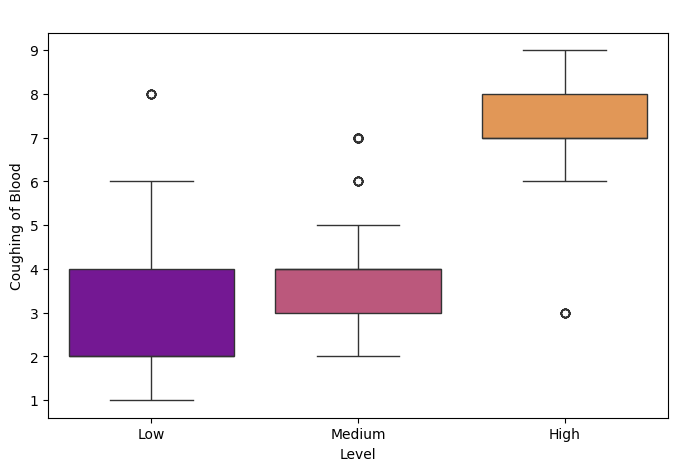

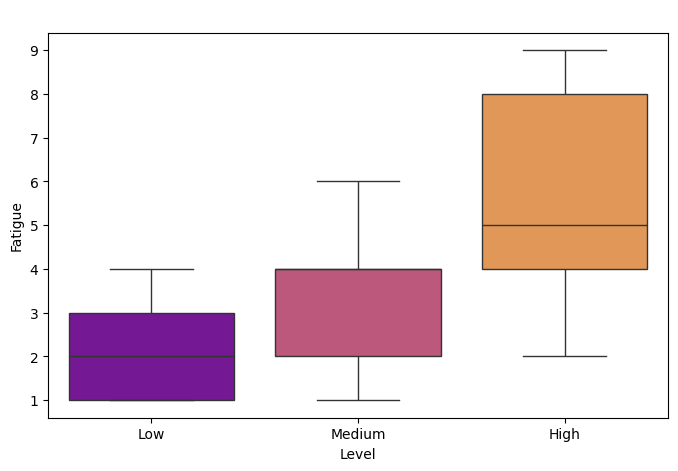

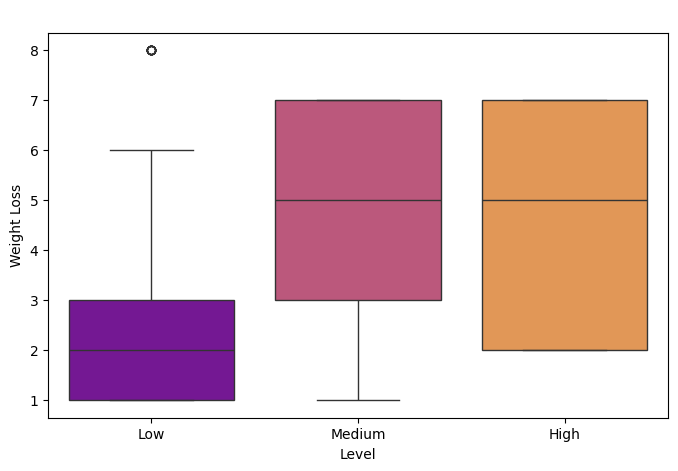

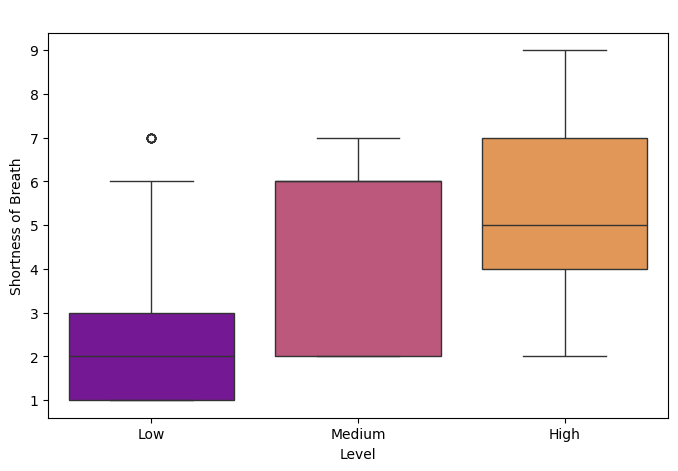

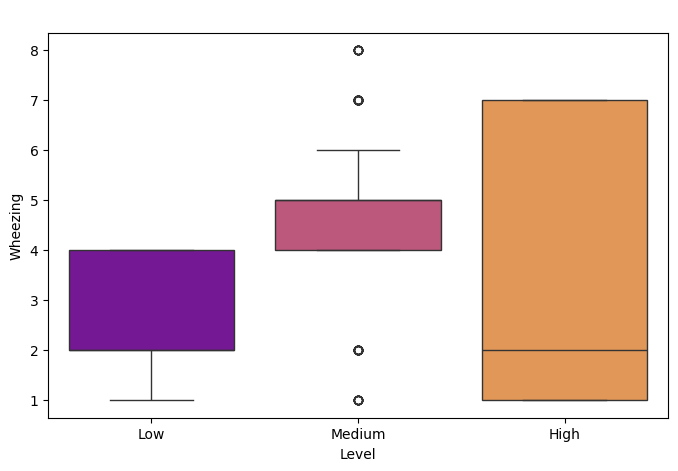

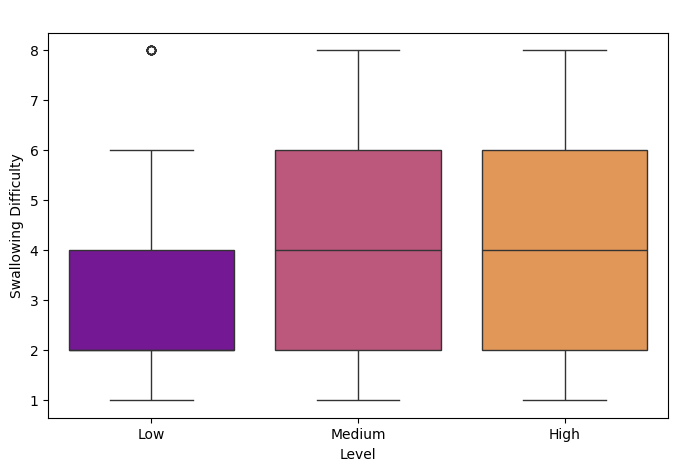

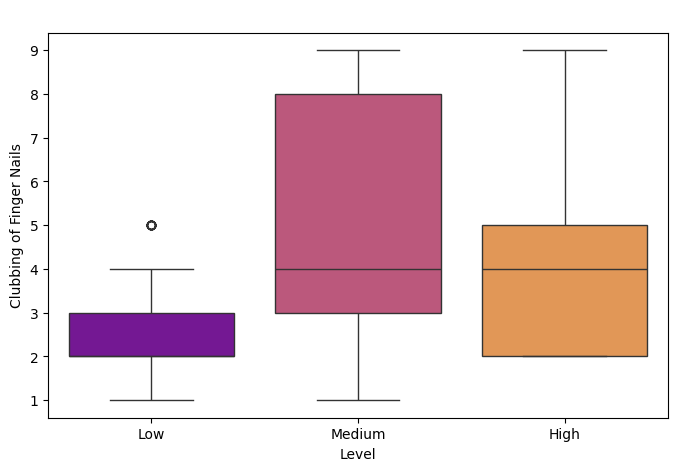

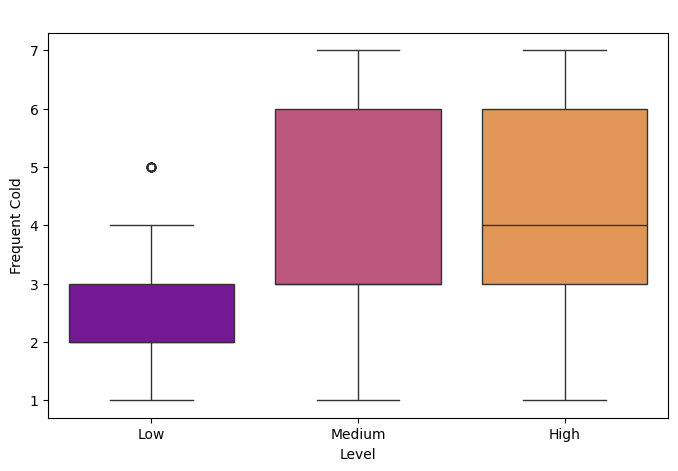

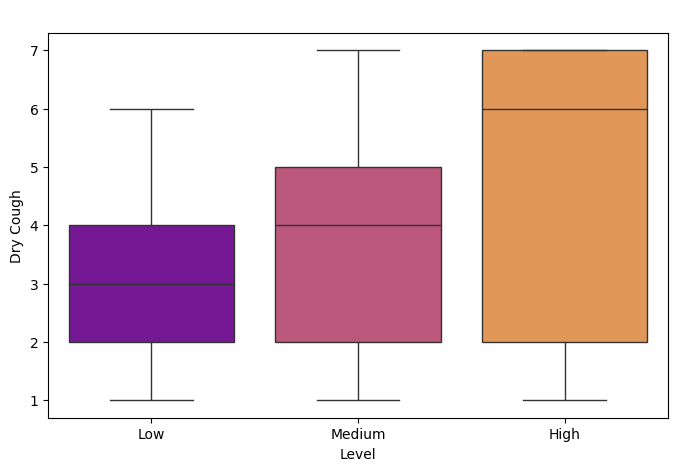

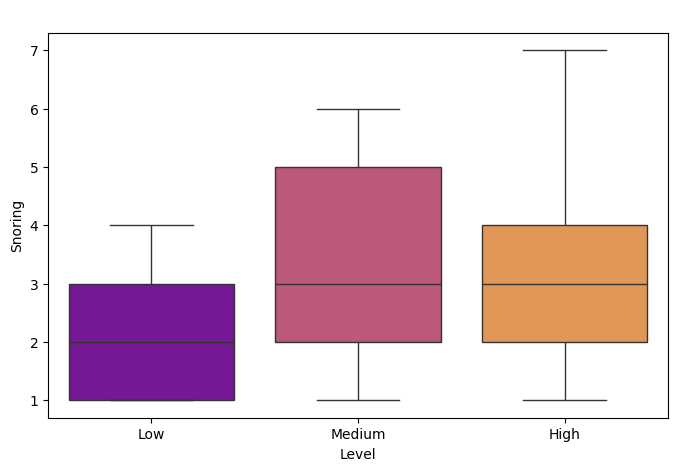

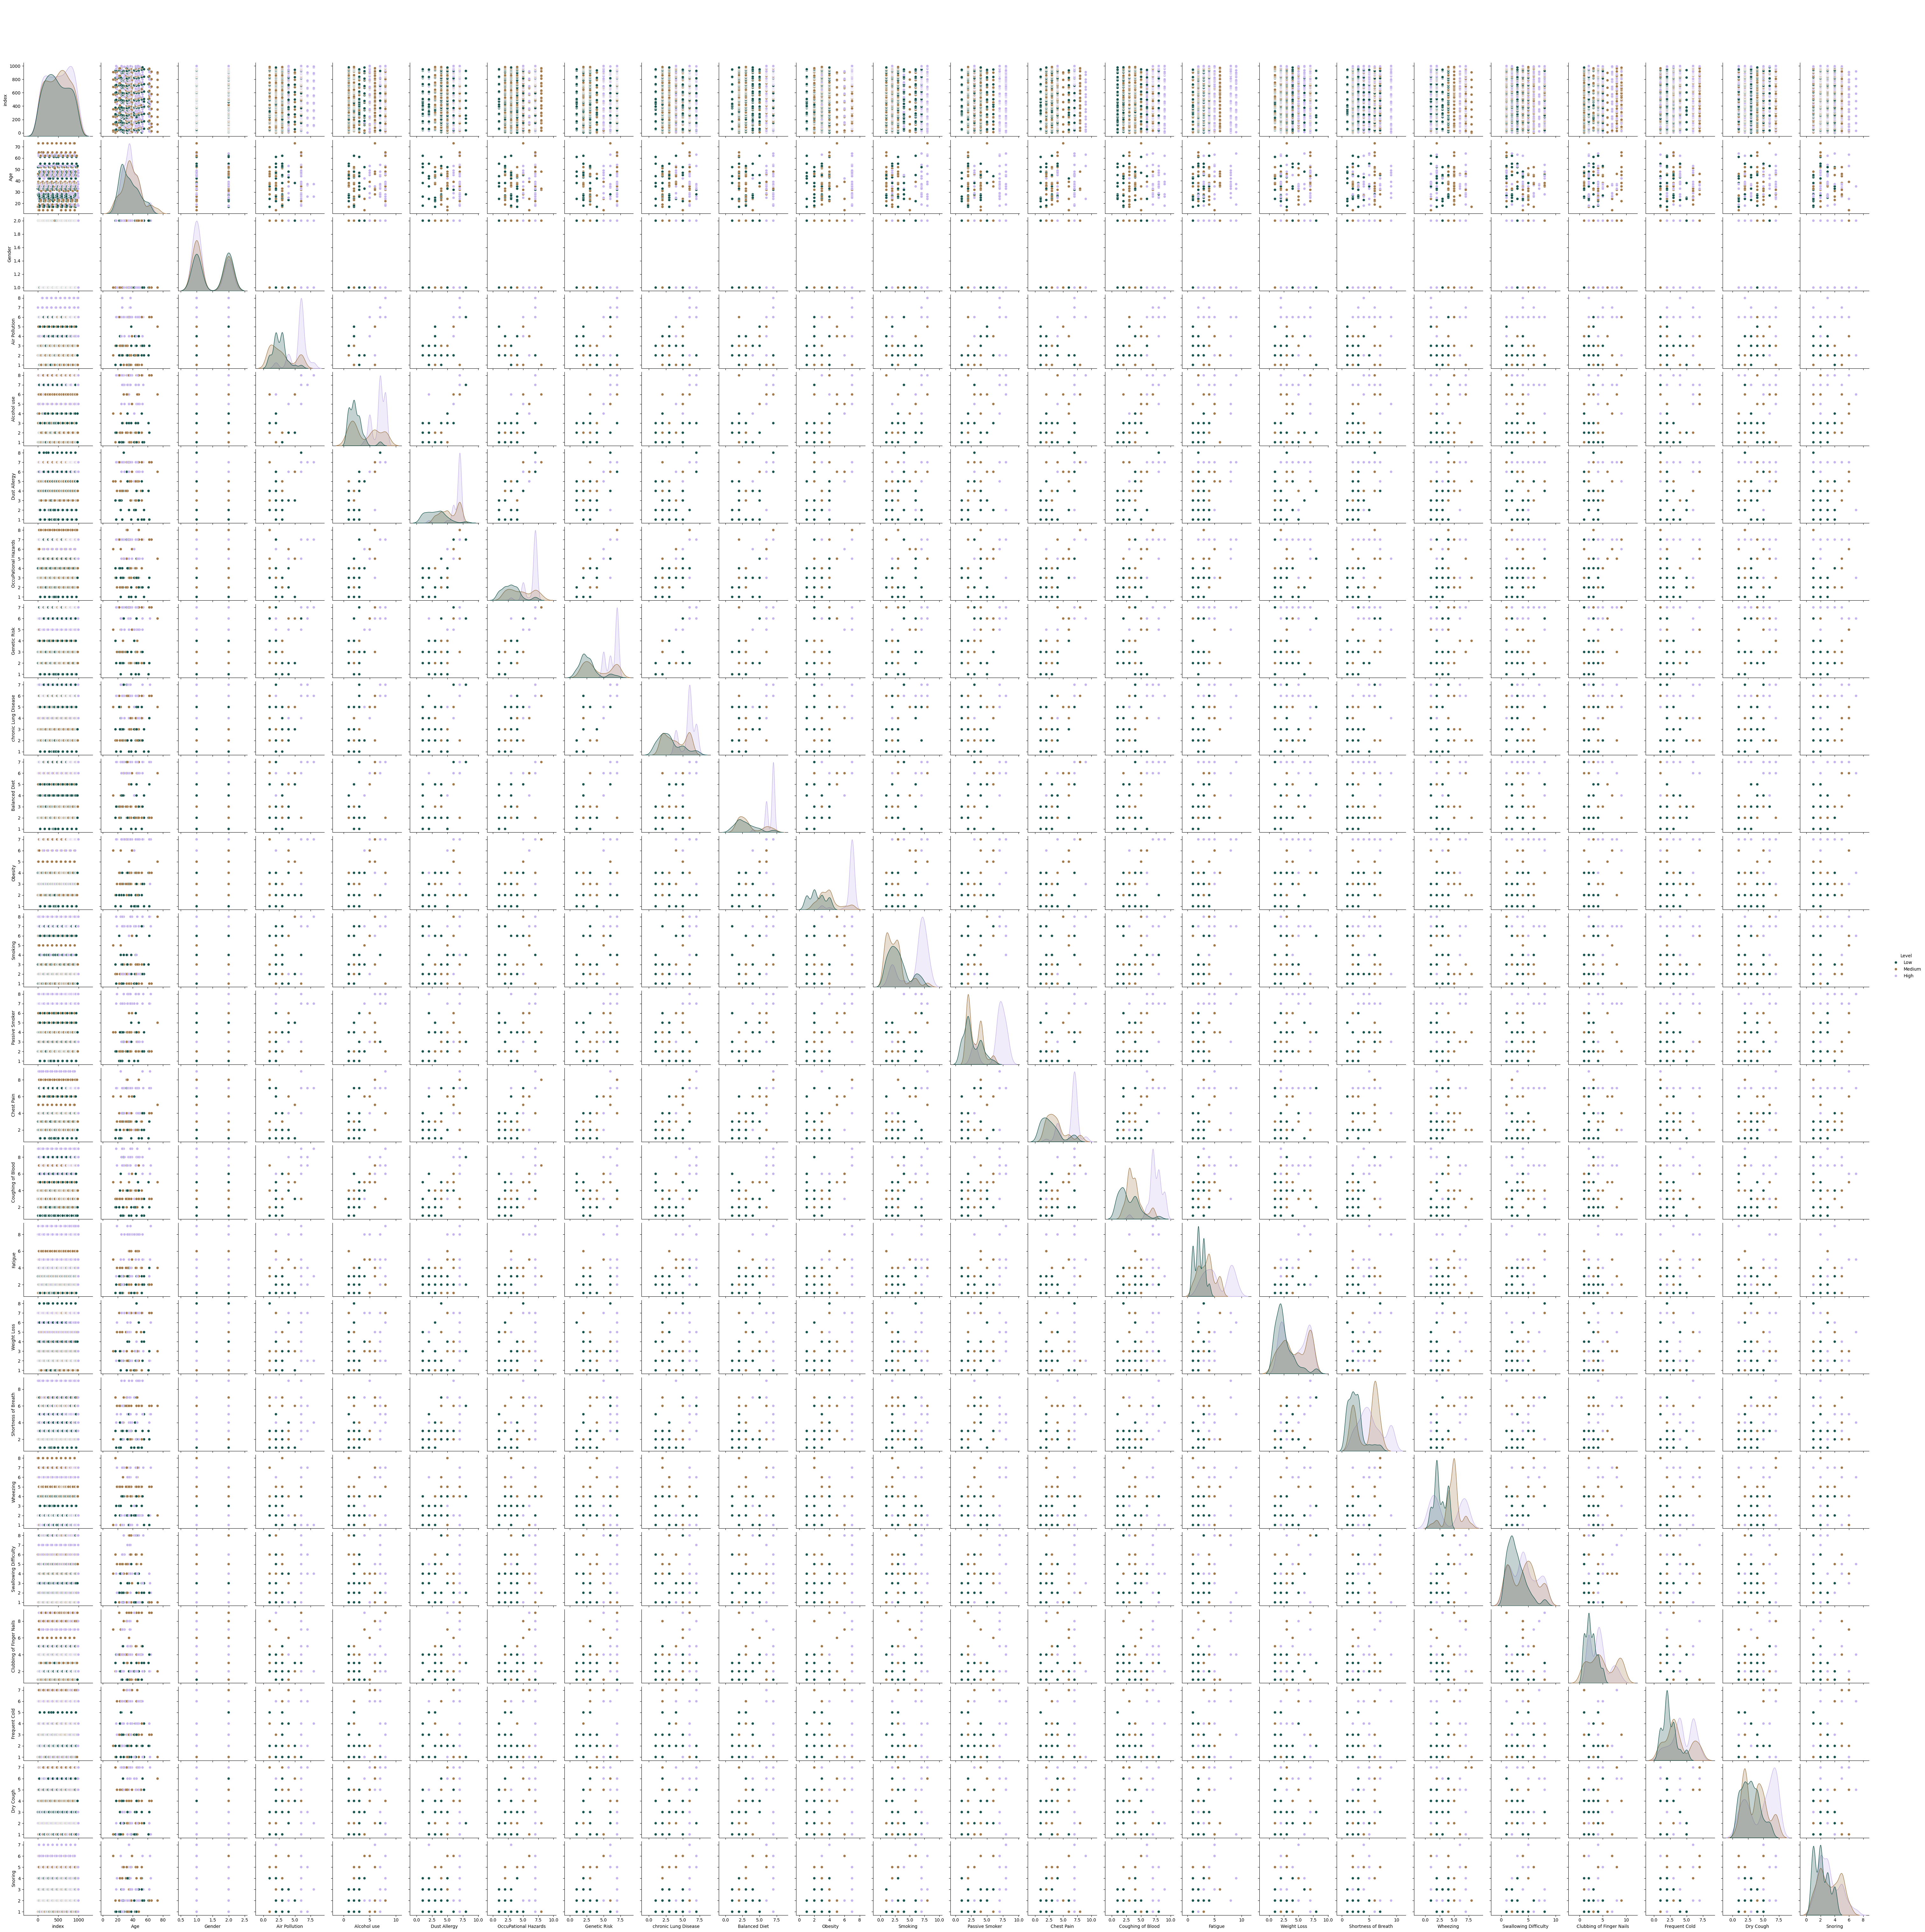

In [15]:
#call function
eda_relationships(df, target_col="Level")

In [17]:
def eda_stats_tests_viz(df, target_col="lung_cancer"):
    """
    Perform statistical tests and visualize significance:
    - Chi-square test for categorical vs target
    - T-test / Mann-Whitney U test for numerical vs target
    - Returns a DataFrame with p-values
    - Generates barplot showing p-values for all features
    """

    results = []

    # Split columns
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("patient_id", errors="ignore")
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop(target_col, errors="ignore")

    # --- Chi-Square Test (Categorical vs Target) ---
    for col in categorical_cols:
        contingency = pd.crosstab(df[col], df[target_col])
        chi2, p, dof, expected = chi2_contingency(contingency)
        results.append({
            "Feature": col,
            "Test": "Chi-square",
            "p-value": p,
            "Significant": "Yes ✅" if p < 0.05 else "No ❌"
        })

    # --- T-Test or Mann-Whitney (Numeric vs Target) ---
    for col in numeric_cols:
        groups = df.groupby(target_col)[col].apply(list)
        if len(groups) == 2:  # binary target
            group1, group2 = groups.iloc[0], groups.iloc[1]
            try:
                stat, p = ttest_ind(group1, group2, nan_policy="omit")
                test_used = "T-test"
            except:
                stat, p = mannwhitneyu(group1, group2, alternative="two-sided")
                test_used = "Mann-Whitney U"
            results.append({
                "Feature": col,
                "Test": test_used,
                "p-value": p,
                "Significant": "Yes ✅" if p < 0.05 else "No ❌"
            })

    df_results = pd.DataFrame(results)

    # --- Visualization ---
    plt.figure(figsize=(10,6))
    sns.barplot(
        data=df_results.sort_values("p-value"),
        x="p-value",
        y="Feature",
        hue="Significant",
        dodge=False,
        palette={"Yes ✅":"seagreen", "No ❌":"salmon"}
    )
    plt.axvline(0.05, color="yellow", linestyle="--", label="Significance Threshold (0.05)")
    plt.title("Feature Significance vs Target", fontsize=14)
    plt.xlabel("p-value")
    plt.ylabel("Feature")
    plt.legend()
    plt.show()

    return df_results

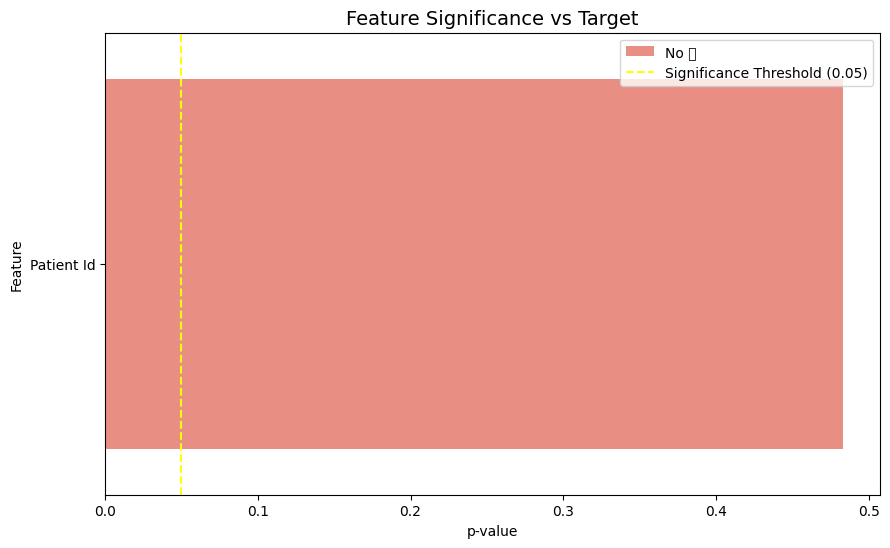

Feature        Test  p-value Significant
0  Patient Id  Chi-square  0.48318        No ❌

In [19]:
#call function
stats= eda_stats_tests_viz(df, target_col="Level")
#show
stats

In [21]:
features =df[['Air Pollution','OccuPational Hazards','Passive Smoker','Genetic Risk',
              'Smoking','Age','Level']]

In [23]:
#convert categorical to Numerical
features = features.copy()
# features.loc[:,'Final_Prediction'] = features['Final_Prediction'].map({'Yes': 1, 'No': 0}) # This line is not needed as 'Level' is handled by LabelEncoder

In [24]:
features.head()

Air Pollution  OccuPational Hazards  Passive Smoker  Genetic Risk  Smoking  \
0              2                     4               2             3        3   
1              3                     3               4             4        2   
2              4                     5               3             5        2   
3              7                     7               7             6        7   
4              6                     7               7             7        8   

   Age   Level  
0   33     Low  
1   17  Medium  
2   35    High  
3   37    High  
4   46    High

In [25]:
#call Label encoder from Sklearn to convert features
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

for col in features:
    features[col] = le.fit_transform(features[col])

In [26]:
#show after Encoded
features.head()

Air Pollution  OccuPational Hazards  Passive Smoker  Genetic Risk  Smoking  \
0              1                     3               1             2        2   
1              2                     2               3             3        1   
2              3                     4               2             4        1   
3              6                     6               6             5        6   
4              5                     6               6             6        7   

   Age  Level  
0   14      1  
1    1      2  
2   16      0  
3   18      0  
4   25      0

In [27]:
X=features.iloc[:,:-1]
y=features.iloc[:,-1]

In [28]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#show train data after splited
X_train.head()

Air Pollution  OccuPational Hazards  Passive Smoker  Genetic Risk  \
29               0                     4               2             2   
535              5                     6               6             5   
695              0                     4               2             2   
557              5                     6               1             6   
836              1                     1               2             0   

     Smoking  Age  
29         2   10  
535        7   31  
695        2   10  
557        0   35  
836        3   19

In [30]:
#show traget in data after split
y_train.head()

29     2
535    0
695    2
557    2
836    1
Name: Level, dtype: int64


DecisionTreeClassifier Validation Accuracy: 0.9950

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



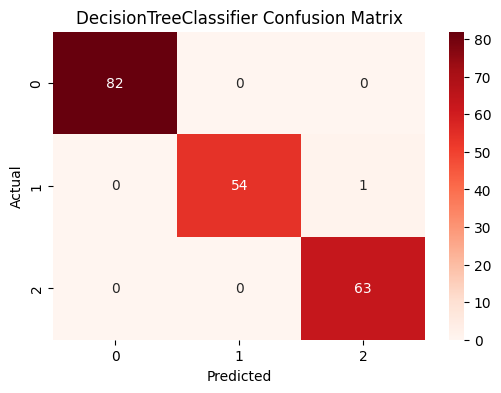

In [31]:
# DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_val_pred)
dt_class_report = classification_report(y_test, dt_val_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_val_pred)

print("\nDecisionTreeClassifier Validation Accuracy: {:.4f}".format(dt_accuracy))
print("\nDecisionTreeClassifier Classification Report:\n", dt_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


RandomForestClassifier Validation Accuracy: 1.0000

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



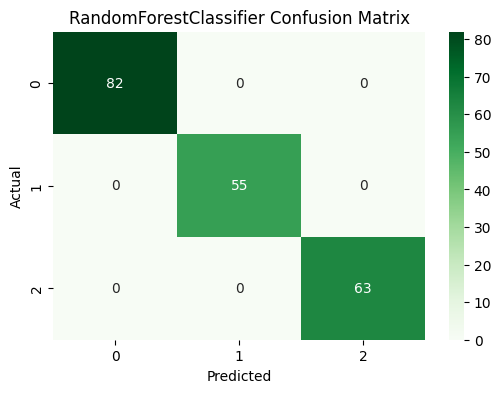

In [32]:
# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_val_pred)
rf_class_report = classification_report(y_test, rf_val_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_val_pred)

print("\nRandomForestClassifier Validation Accuracy: {:.4f}".format(rf_accuracy))
print("\nRandomForestClassifier Classification Report:\n", rf_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KNN Classifier Validation Accuracy: 0.9900

KNN Classifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        82
           1       0.98      0.98      0.98        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



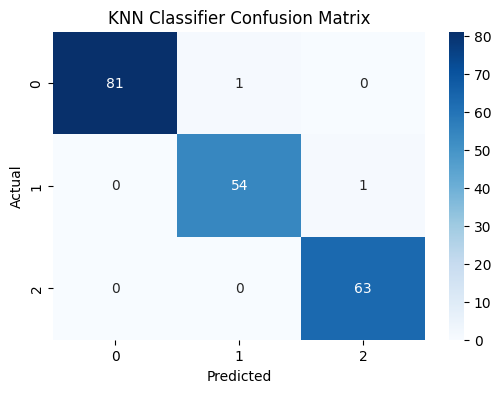

In [33]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_val_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_val_pred)
knn_class_report = classification_report(y_test, knn_val_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_val_pred)

print("\nKNN Classifier Validation Accuracy: {:.4f}".format(knn_accuracy))
print("\nKNN Classifier Classification Report:\n", knn_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Naive Bayes Classifier Validation Accuracy: 0.7350

Naive Bayes Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.62      0.85      0.72        55
           2       0.62      0.49      0.55        63

    accuracy                           0.73       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.75      0.73      0.73       200



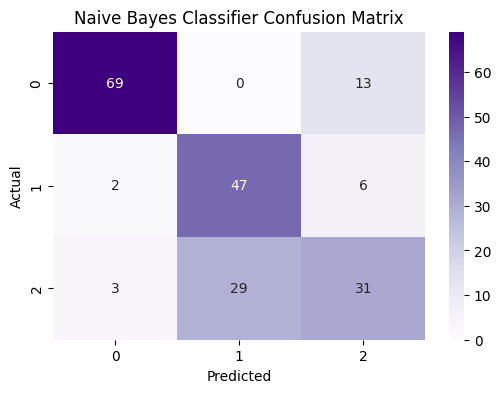

In [34]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_val_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_val_pred)
nb_class_report = classification_report(y_test, nb_val_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_val_pred)

print("\nNaive Bayes Classifier Validation Accuracy: {:.4f}".format(nb_accuracy))
print("\nNaive Bayes Classifier Classification Report:\n", nb_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Mapping of K-Means Clusters to Actual Classes:
{0: 1, 1: 0}

K-Means (attempted classification) Accuracy: 0.5880

K-Means (attempted classification) Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       365
           1       0.52      0.90      0.66       303
           2       0.00      0.00      0.00       332

    accuracy                           0.59      1000
   macro avg       0.39      0.59      0.47      1000
weighted avg       0.40      0.59      0.47      1000



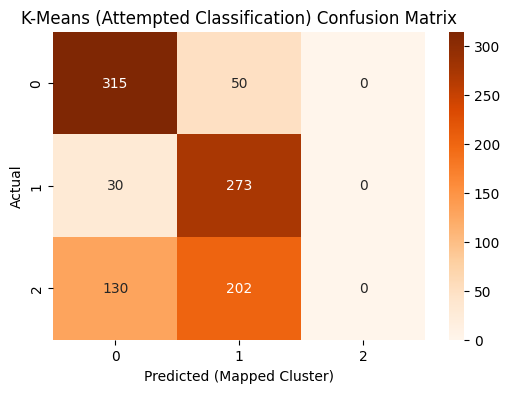

In [35]:
# K-Means Clustering (Note: This is for clustering, not typically used directly for classification like the previous models)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters (e.g., using the Elbow method or Silhouette score)
# For demonstration, let's assume we want 2 clusters (corresponding to the two classes in Final_Prediction)
# In a real-world scenario, you would explore different numbers of clusters.

# Since K-Means is unsupervised, we'll use the features (X) without the target variable (y)
# It's often beneficial to scale the data before applying K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize and fit the K-Means model
# We set n_clusters to 2 to align with the target variable's classes (0 and 1), for demonstration
# In a true clustering task, you would determine the optimal n_clusters differently.
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init for KMeans
kmeans.fit(X_scaled)

# Get the cluster assignments for each data point
clusters = kmeans.labels_

# You can evaluate the clustering performance using metrics like Silhouette Score
# print(f"Silhouette Score: {silhouette_score(X_scaled, clusters):.4f}")

# To *attempt* to use this for classification (again, not a standard approach):
# You would typically map the cluster labels to your actual class labels (0 and 1)
# This requires inspecting which cluster corresponds to which class based on your labeled data.
# This mapping can be ambiguous and is not guaranteed to align well.

# For a simplistic demonstration, let's create a 'predicted' class based on the cluster assignments
# We need to figure out which cluster corresponds to which 'Final_Prediction' class.
# This requires comparing the cluster assignments to the original 'Final_Prediction' labels.

# Let's create a temporary DataFrame to easily compare clusters and actual labels
temp_df = pd.DataFrame({'Cluster': clusters, 'Actual': y})

# Find the mapping from cluster label to actual label (most frequent actual label within each cluster)
cluster_to_class = temp_df.groupby('Cluster')['Actual'].agg(lambda x: x.mode()[0]).to_dict()

print("Mapping of K-Means Clusters to Actual Classes:")
print(cluster_to_class)

# Map the cluster assignments to the predicted class labels
kmeans_pred_class = np.array([cluster_to_class[cluster] for cluster in clusters])

# Now you can evaluate this *attempted* classification using standard classification metrics
# Note: This evaluation is just to show how the clusters align with the actual classes,
# it doesn't mean K-Means is a good classifier for this problem.
kmeans_accuracy = accuracy_score(y, kmeans_pred_class)
kmeans_class_report = classification_report(y, kmeans_pred_class)
kmeans_conf_matrix = confusion_matrix(y, kmeans_pred_class)


print("\nK-Means (attempted classification) Accuracy: {:.4f}".format(kmeans_accuracy))
print("\nK-Means (attempted classification) Classification Report:\n", kmeans_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(kmeans_conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('K-Means (Attempted Classification) Confusion Matrix')
plt.xlabel('Predicted (Mapped Cluster)')
plt.ylabel('Actual')
plt.show()


XGBoostClassifier Validation Accuracy: 1.0000

XGBoostClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



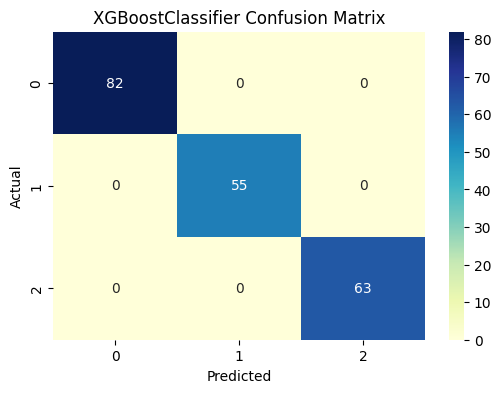

In [36]:
try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_val_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_val_pred)
    xgb_class_report = classification_report(y_test, xgb_val_pred)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_val_pred)

    print("\nXGBoostClassifier Validation Accuracy: {:.4f}".format(xgb_accuracy))
    print("\nXGBoostClassifier Classification Report:\n", xgb_class_report)
    plt.figure(figsize=(6,4))
    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('XGBoostClassifier Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
except ImportError:
    print("XGBoost is not installed.")

In [51]:
#bulding Deeplearning model (layers)
input_dl = X_train.shape[1]
model = keras.Sequential([
    layers.Input(shape=(input_dl,)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(np.unique(y_train)), activation='softmax') # Changed to 3 units and softmax
])

In [52]:
#model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy', # Changed loss function for multiclass
    metrics=['accuracy', keras.metrics.SparseCategoricalAccuracy(name='sparse_categorical_accuracy')]
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,883 (11.26 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 128 (512.00 B)

In [39]:
#Number of samples for each class.
print(pd.Series(y_train).value_counts())

Level
0    283
2    269
1    248
Name: count, dtype: int64


In [40]:
#Percentage of each class
print(pd.Series(y_train).value_counts(normalize=True) * 100)

Level
0    35.375
2    33.625
1    31.000
Name: proportion, dtype: float64


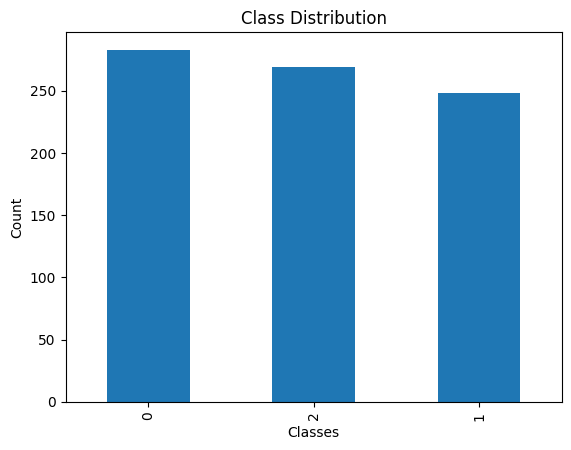

In [41]:
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

In [42]:
#It retrieves the different categories (labels) present in the data y_train
def get_class_weights(y):
    #Extracting clades
    classes = np.unique(y)

    #Calculate weights using balanced
    class_weights = compute_class_weight(class_weight='balanced',
                                         classes=classes,
                                         y=y)
    class_weight_dict = dict(zip(classes, class_weights))

    print("Class weights:", class_weight_dict)
    return class_weight_dict

In [43]:
#show the result
weights = get_class_weights(y_train)

Class weights: {np.int64(0): np.float64(0.9422850412249706), np.int64(1): np.float64(1.075268817204301), np.int64(2): np.float64(0.9913258983890955)}


In [44]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=y_train)

class_weight_dict = dict(zip(classes, class_weights))
print("Class Weights:", class_weight_dict)

Class Weights: {np.int64(0): np.float64(0.9422850412249706), np.int64(1): np.float64(1.075268817204301), np.int64(2): np.float64(0.9913258983890955)}


In [45]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 305ms/step - AUC: 0.7855 - accuracy: 0.4965 - loss: 0.8829 - val_AUC: 0.8286 - val_accuracy: 0.4100 - val_loss: 1.2206
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8093 - accuracy: 0.4940 - loss: 0.8509 - val_AUC: 0.8776 - val_accuracy: 0.4100 - val_loss: 1.0486
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8332 - accuracy: 0.4862 - loss: 0.7581 - val_AUC: 0.8986 - val_accuracy: 0.4200 - val_loss: 0.9321
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8405 - accuracy: 0.4916 - loss: 0.6935 - val_AUC: 0.9188 - val_accuracy: 0.4400 - val_loss: 0.8372
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8300 - accuracy: 0.5195 - loss: 0.6422 - val_AUC: 0.9319 - val_accuracy: 0.4550 - val_loss: 0.7607
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.8576 - accuracy: 0.5299 - loss: 0.6091 - val_AUC: 0.9418 - val_accuracy: 0.4800 - val_loss: 0.6969
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8m

In [47]:
#evaluate for new data
test_loss, test_acc, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - AUC: 0.9272 - accuracy: 0.6002 - loss: -6.3540 
Test Accuracy: 0.6150
Test AUC: 0.9157


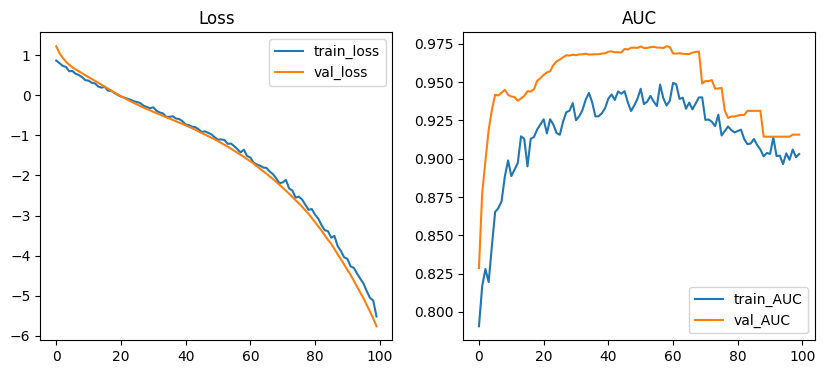

In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['AUC'], label='train_AUC')
plt.plot(history.history['val_AUC'], label='val_AUC')
plt.title('AUC')
plt.legend()
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
Test ROC AUC (OvR): 0.4699372909184851

Classification report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.28      0.71      0.40        55
           2       0.10      0.10      0.10        63

    accuracy                           0.23       200
   macro avg       0.13      0.27      0.17       200
weighted avg       0.11      0.23      0.14       200



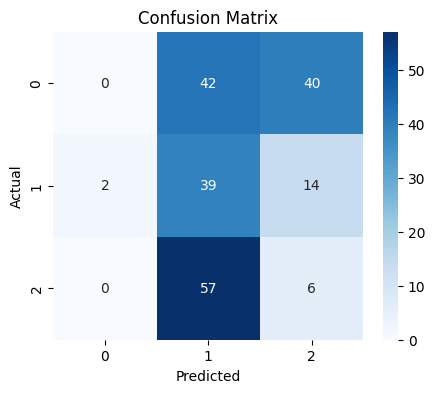

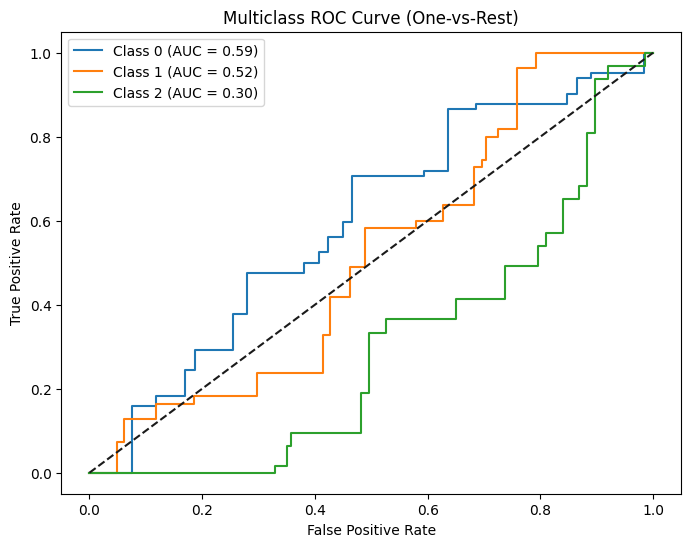

In [53]:
y_pred_prob = model.predict(X_test) # Get probabilities for each class
# y_pred = (y_pred_prob >= 0.5).astype(int) # This was for binary classification

# For multiclass classification, y_pred should be the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)


# Calculate ROC AUC for multiclass
print('Test ROC AUC (OvR):', roc_auc_score(y_test, y_pred_prob, multi_class='ovr'))
# You can also use 'ovo' (one-vs-one)
# print('Test ROC AUC (OvO):', roc_auc_score(y_test, y_pred_prob, multi_class='ovo'))


print('\nClassification report:\n')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC curve for multiclass (one-vs-rest)
plt.figure(figsize=(8, 6))
classes = np.unique(y_test)
for i in range(len(classes)):
    # Get the true labels for the current class (1 if it's the current class, 0 otherwise)
    y_true_class = (y_test == classes[i]).astype(int)
    # Get the predicted probabilities for the current class
    y_pred_prob_class = y_pred_prob[:, i]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_true_class, y_pred_prob_class)

    # Plot ROC curve for the current class
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc_score(y_true_class, y_pred_prob_class):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
   Sample_ID  Predicted_Probability_of_Class  Predicted_Class
0          1                        0.369801                2
1          2                        0.367437                2
2          3                        0.379961                2
3          4                        0.408410                2
4          5                        0.352967                2
5          6                        0.397688                2
6          7                        0.437969                2
7          8                        0.391790                2
8          9                        0.405397                2
9         10                        0.348739                1


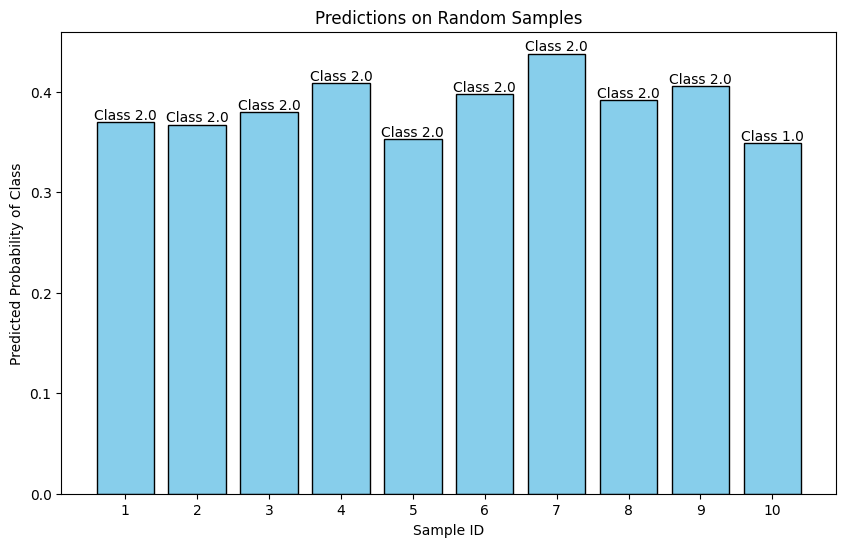

In [55]:
# features
n_features = X_train.shape[1]

# randam 10 samples
random_samples = np.random.rand(10, n_features)

# model predict
preds_prob = model.predict(random_samples) # Get probabilities for each class

# predicted class
classes = np.argmax(preds_prob, axis=1)

# probability of the predicted class
preds = np.max(preds_prob, axis=1)


#  DataFrame
df_results = pd.DataFrame({
    "Sample_ID": range(1, 11),
    "Predicted_Probability_of_Class": preds,
    "Predicted_Class": classes
})

print(df_results)

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_results["Sample_ID"], df_results["Predicted_Probability_of_Class"], color="skyblue", edgecolor="black")
# plt.axhline(0.5, color="red", linestyle="--", label="Threshold = 0.5") # Threshold of 0.5 is not directly applicable for multiclass probabilities of specific classes
plt.xticks(df_results["Sample_ID"])
plt.xlabel("Sample ID")
plt.ylabel("Predicted Probability of Class")
plt.title("Predictions on Random Samples")
# You might want to annotate the bars with the predicted class
for i, row in df_results.iterrows():
    plt.text(row['Sample_ID'], row['Predicted_Probability_of_Class'], f'Class {row["Predicted_Class"]}', ha='center', va='bottom')

plt.show()

In [56]:
# Create a dictionary to store model accuracies
model_accuracies = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'XGBoost': xgb_accuracy,
    'Deep Learning Model': test_acc # Using test_acc from the evaluation cell
}

# Create a pandas DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])

# Sort the DataFrame by accuracy
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)

# Display the DataFrame
print("Model Accuracies:")
display(accuracy_df)

Model Accuracies:


Accuracy
Random Forest           1.000
XGBoost                 1.000
Decision Tree           0.995
KNN                     0.990
Naive Bayes             0.735
Deep Learning Model     0.615